# Customer Segmentation using Unsupervised Learning

In this tutorial, we will implement customer segmentation using unsupervised learning to segment customers based on characteristics provided in the data.

Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics such as customer's demographic characteristics (occupation, gender, age, location, and marital status), Psychographic characteristics (social class, lifestyle), and personality characteristics and behavioral characteristics (spending, consumption habits, product/service usage, and previously purchased products). 

## In this notebook

 - Use Pandas & scikit-learn
 - Train clustering models
 - Evaluate clustering models
 - Save and load trained models

Tutorial adapted from: https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be
Data source: https://raw.githubusercontent.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means/master/cust_seg.csv

In [1]:
# step 1: Install packages

#!pip install pandas numpy matplotlib seaborn termcolor sklearn plotly

In [3]:
# Step 2: Import packages

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
import plotly.graph_objects as go # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Configure plotting

plt.rcParams['figure.figsize'] = (15, 5)
sb.set_style('whitegrid')

In [6]:
# IMPORTING DATA

df = pd.read_csv('cust_seg.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


## Data Understanding

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


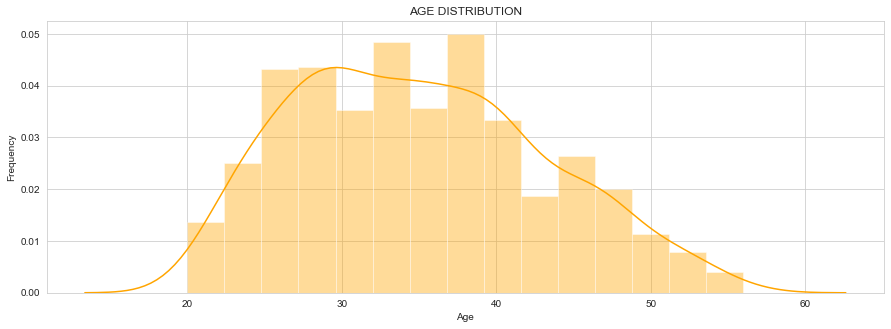

In [7]:
# We will start by analyzing the age distribution among the customers. 

print(df['Age'].describe())

sb.distplot(df['Age'], color = 'orange')
plt.title('AGE DISTRIBUTION')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('age_distribution.png')
plt.show()

By seeing the graph we can understand that the age with the highest number of customers is around 35–40 and the lowest customer count is between 50–60.

Number of Default cases are 183
Number of Non-Default cases are 517
Percentage of Default cases is 35%


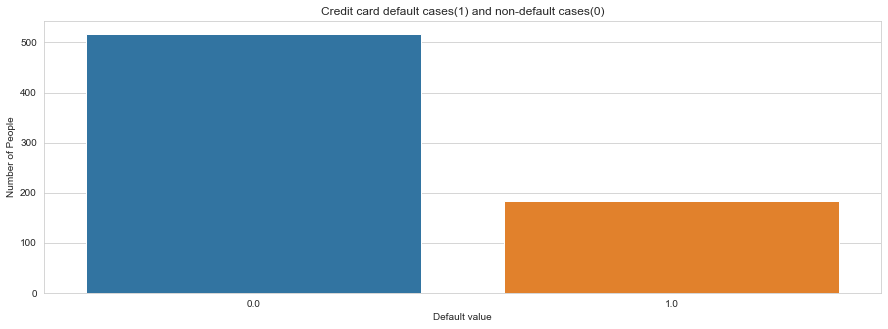

In [8]:
# Analyzing the Defaulted distribution among the customers. 

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print('Number of Default cases are {}'.format(len(default)))
print('Number of Non-Default cases are {}'.format(len(non_default)))
print('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)))

sb.countplot(df['Defaulted'])
plt.title('Credit card default cases(1) and non-default cases(0)')
plt.xlabel('Default value')
plt.ylabel('Number of People')
#plt.savefig('default_cases.png')
plt.show()

Most of the customers have not defaulted on their credit cards. To be more precise, the number of customers who have defaulted is 183 and the number of non-default customers is 517 which means 35% of the customers have defaulted on their credit card.

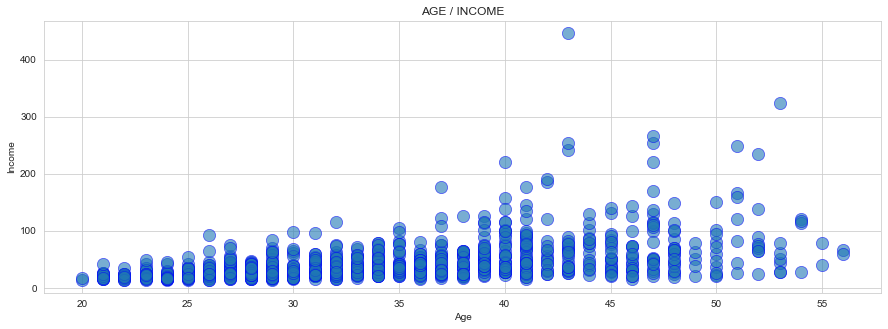

In [9]:
# Analyzing Age vs Income

sb.scatterplot('Age', 'Income', 
               data = df,
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME')
plt.xlabel('Age')
plt.ylabel('Income')

#plt.savefig('age_income.png')
plt.show()

When the age increases, the income also increases. So we can say that the attributes ‘Age’ and ‘Income’ are having a linear relationship.

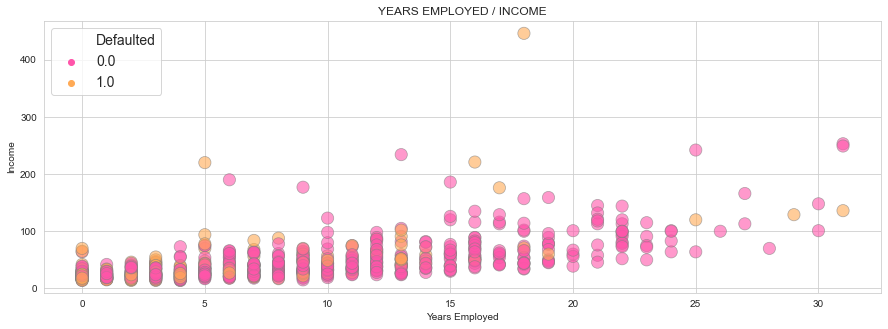

In [10]:
# Analyze the ‘Income’, ‘Years Employed’, and ‘Defaulted’ attributes

sb.scatterplot('Years Employed', 'Income', 
               data = df,
               s = 150,
               alpha = 0.6, 
               edgecolor = 'grey', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.legend(loc = 'upper left', fontsize = 14)

#plt.savefig('y_income.png')
plt.show()

## Data Prepartaion

In [11]:
# normalizing the dataset

X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

scaled_data = sc.fit_transform(X)
print('Cluster data samples : ', scaled_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


## Modeling

In [17]:
# K-Mean parameters
'''
- init: Initialization method of the centroids. 
- n_clusters - The number of clusters to form.
- n_init - Number of times the k-means algorithm will be run with different centroid seeds. 
'''
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(scaled_data)

labels = model.labels_
print(labels[:100])
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2]
[[  0 166]
 [  1 147]
 [  2 537]]


In [18]:
# Let's add an attribute to the customer data that shows the cluster value for each row.

df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,2
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,2
5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [19]:
# Calculate the mean value of each of the attributes in the dataset

df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


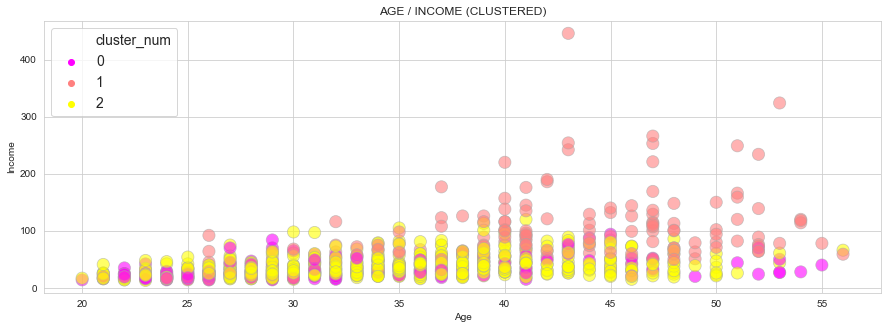

In [20]:
# Let’s look at the distribution of customers based on their age and income using a bubble plot 
# and the color represents the cluster value.

sb.scatterplot('Age', 'Income', 
               data = df, 
               s = 150, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(loc = 'upper left', fontsize = 14)

#plt.savefig('c_age_income.png')
plt.show()

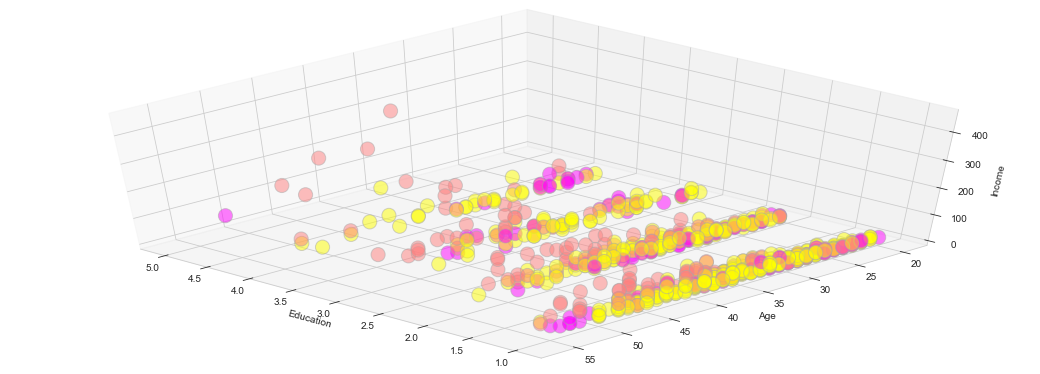

In [21]:
# Let's produce a three-dimensional scatter plot for Education, Age, Income, and cluster using the ‘mplot3d’ package

fig = plt.figure(1)
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

#plt.savefig('3d_plot.png')
plt.show()

In [23]:
# Calculate Error 

#BetaCV implementation from https://github.com/hayashikan/betacv

from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances
from math import ceil
import numpy as np
import time

def betacv(data, labels, metric='euclidean'):
    distances = pairwise_distances(data, metric=metric)
    n = labels.shape[0]
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A)
    b = np.sum(B)
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    betacv = (a/n_in)/(b/n_out)
    #print('intra:', a)
    #print('inter:', b)
    #print('n_in :', n_in)
    #print('n_out:', n_out)
    return betacv

def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask])
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask])
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

In [24]:
# A small BetaCV score is better
kmeans3ClustersBetaCVScore = betacv(scaled_data, model.labels_)
kmeans3ClustersBetaCVScore

0.5759031871244732

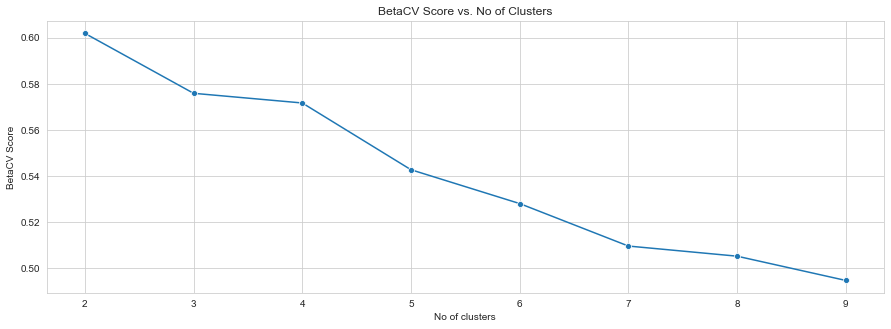

In [25]:
#Let's evaluate the effect of increasing the number of clusters

models = []
scores = []
for i in range(2,10):
    new_model = KMeans(n_clusters=i, random_state=42, max_iter=500).fit(scaled_data)
    models.append(new_model)
    scores.append(betacv(scaled_data, new_model.labels_))

models_scores_df = pd.DataFrame({'k':range(2,10), 'score':scores})

# Plot performance
sb.lineplot(x='k', y='score', data = models_scores_df, marker="o")
plt.title('BetaCV Score vs. No of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('BetaCV Score')
plt.show()

Our K-Means model has partitioned the customers into mutually exclusive groups, which are three clusters in our case. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:
* Affluent, Educated & Old Aged
* Middle-Aged & Middle Income
* Young & Low Income

# Saving the trained model

In [26]:
#import the pickle library
import pickle

In [27]:
# save the model to disk
filename = 'cust_seg_KMeanModel.mdl'
pickle.dump(model, open(filename, 'wb'))

# Load the model later

In [28]:
# load the model from disk
filename = 'cust_seg_KMeanModel.mdl'
loaded_model = pickle.load(open(filename, 'rb'))

#assume the new record is the last record in the data file:
new_record = df.iloc[-1].values.reshape(1,-1)
# exclude the last column which is the cluster number we added while doing the taining
X = new_record[:,:8]
X = np.nan_to_num(X)
sc = StandardScaler()
scaled_data = sc.fit_transform(X)
result = loaded_model.predict(scaled_data)
print(result)

[2]
